Project goals

0.0 Import and inspect the dataset using pandas.

1.0 Analyze the dataset using pandas and numpy.

2.0 Create visualizations using matplotlib and seaborn.

3.0 Interpret meanings from the data using the Scientific Method ("Data Science!")

Data Science Libraries

To get everything running in this project:

pip install -r requirements.txt

First, we will grab the industry standard Data Science libraries to analyze the dataset of 150,930 records.

Python convention is important to follow, so we will use the standard aliases for each of the libraries (for example: numpy as np).

Analysis tools
NumPy
Pandas

Visualization tools
Matplotlib
Seaborn

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import bokeh as bk
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [5]:
import warnings
warnings.filterwarnings('ignore')
# This was a warning on the KDE Plot for 2D topo mappings

In [6]:
df_wine = pd.read_csv(r"C:\Users\Acer\Desktop\self-Projects\10 Wine\winemag-data_first150k (1).csv")

In [14]:
df_wine.head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [21]:
##Combing the region1 & region2 column together and then deleting the separte columns

In [17]:
df_wine['region_1'] = df_wine['region_1'].astype(str)

In [18]:
df_wine['region_2'] = df_wine['region_2'].astype(str)

In [19]:
df_wine['region_concat'] = df_wine['region_1'].str.cat(df_wine['region_2'], sep=',')

In [ ]:
df_wine = df_wine.drop(['region_1', 'region_2'], axis =1)

##dropped the 2 separte columns in the dataset

In [23]:
df_wine.shape

(97848, 9)

In [25]:
df_wine = df_wine.drop(['Unnamed: 0'], axis =1)
## Check for the duplicate rows in the data

In [26]:
df_wine = df_wine.drop_duplicates()

In [27]:
df_wine.shape

(97848, 9)

In [28]:
df_wine.isnull().sum()

country              0
description          0
designation      29896
points               0
price             8720
province             0
variety              0
winery               0
region_concat        0
dtype: int64

Null values in the following columns are found -
Country,
Designation,
Price,
Province,
Region_1,
Region_2

In [13]:
df_wine = df_wine.dropna(subset = ['country'], axis =0)

In [43]:
df_wine['country'].isnull().sum()

0

In [44]:
df_wine['province'].isnull().sum()

0

In [45]:
df_wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [ ]:
##COUNTRY COLUMN

In [29]:
df_wine['country'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', 'India',
       'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [33]:
df_wine['country'].value_counts()

US                        40544
Italy                     14850
France                    14459
Spain                      5443
Chile                      3735
Portugal                   3508
Argentina                  3447
Australia                  3152
Austria                    1959
New Zealand                1865
Germany                    1529
South Africa               1481
Greece                      541
Israel                      370
Canada                      149
Hungary                     139
Romania                     106
Slovenia                     72
Croatia                      70
Bulgaria                     56
Mexico                       54
Uruguay                      52
Moldova                      46
Turkey                       46
Georgia                      30
Lebanon                      27
Cyprus                       15
Brazil                       14
Macedonia                    12
Morocco                      11
Serbia                       10
England 

In [35]:
len(df_wine['country'].unique())

48

In [36]:
##PRICE COLUMN

In [38]:
df_wine['price'].max()

2300.0

In [39]:
df_wine[df_wine['price']==2300]

,country,description,designation,points,price,province,variety,winery,region_concat
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Bordeaux-style Red Blend,Château Latour,"Pauillac,nan"


In [40]:
avg_price = df_wine['price'].mean()

In [41]:
avg_price

33.65922044699758

In [42]:
df_wine['price'].min()

4.0

In [45]:
df_wine[df_wine['price']==4]

,country,description,designation,points,price,province,variety,winery,region_concat
1858,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,Chardonnay,Pam's Cuties,"California,California Other"
25645,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,Merlot,Bandit,"California,California Other"
34415,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Cabernet Sauvignon,Terrenal,"Yecla,nan"
34682,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Tempranillo,Terrenal,"Yecla,nan"
36716,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Malbec-Syrah,Broke Ass,"Mendoza,nan"
73417,Romania,Notes of sun-dried hay and green flower highli...,UnWineD,86,4.0,Viile Timisului,Pinot Grigio,Cramele Recas,"nan,nan"
90546,Argentina,Clean as anyone should reasonably expect given...,NaN,85,4.0,Mendoza Province,Malbec,Toca Diamonte,"Mendoza,nan"
99045,Portugal,"This is a ripe-fruited wine, rich with dried f...",Toutalga,86,4.0,Alentejano,Portuguese Red,Herdade dos Machados,"nan,nan"
114167,US,"Easy, simple peach and strawberry flavors are ...",White Zinfandel,83,4.0,California,Zinfandel,Round Hill,"California,California Other"
118347,US,"Light and earthy, this wine-in-a-box is clean ...",NaN,84,4.0,California,Cabernet Sauvignon,Bandit,"California,California Other"


In [ ]:
##POINTS COLUMN

In [46]:
df_wine['points'].min()

80

In [47]:
df_wine['points'].max()

100

In [51]:
df_wine[df_wine['points']==100]

,country,description,designation,points,price,province,variety,winery,region_concat
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Bordeaux-style White Blend,Château Haut-Brion,"Pessac-Léognan,nan"
19354,US,"In a stunning lineup of Cayuse Syrahs, the En ...",En Chamberlin Vineyard,100,65.0,Oregon,Syrah,Cayuse,"Walla Walla Valley (OR),Oregon Other"
19355,Australia,Not a Cellar Selection in the traditional sens...,Rare,100,300.0,Victoria,Muscat,Chambers Rosewood Vineyards,"Rutherglen,nan"
24151,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Merlot,Tenuta dell'Ornellaia,"Toscana,nan"
26296,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Chardonnay,Krug,"Champagne,nan"
28954,Italy,"This small, family-run estate in the heart of ...",Guado de' Gemoli,100,195.0,Tuscany,Red Blend,Giovanni Chiappini,"Bolgheri Superiore,nan"
89399,US,Tasted in a flight of great and famous Napa wi...,NaN,100,200.0,California,Cabernet Sauvignon,Cardinale,"Napa Valley,Napa"
92916,US,A perfect score has to be considered in the co...,Hillside Select,100,215.0,California,Cabernet Sauvignon,Shafer,"Stags Leap District,Napa"
98647,US,"A spectacular Pinot Noir, but a very young one...",Litton Estate Vineyard,100,100.0,California,Pinot Noir,Williams Selyem,"Russian River Valley,Sonoma"
111087,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Prugnolo Gentile,Avignonesi,"Vin Santo di Montepulciano,nan"


In [52]:
###VARIETY COLUMN

In [57]:
df_wine['variety'].value_counts().max()

9282

In [59]:
df_wine['variety'].value_counts()

Pinot Noir                  9282
Chardonnay                  9163
Cabernet Sauvignon          8272
Red Blend                   6484
Bordeaux-style Red Blend    5176
                            ... 
Garnacha-Cabernet              1
Tannat-Syrah                   1
Tocai Rosso                    1
Moscatel Graúdo                1
Carnelian                      1
Name: variety, Length: 632, dtype: int64

In [60]:
df_wine[df_wine['variety']=='Pinot Noir']

,country,description,designation,points,price,province,variety,winery,region_concat
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Pinot Noir,Ponzi,"Willamette Valley,Willamette Valley"
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Pinot Noir,Bergström,"Chehalem Mountains,Willamette Valley"
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Pinot Noir,Blue Farm,"Sonoma Coast,Sonoma"
11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Pinot Noir,Patricia Green Cellars,"Ribbon Ridge,Willamette Valley"
12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Pinot Noir,Patricia Green Cellars,"Dundee Hills,Willamette Valley"
...,...,...,...,...,...,...,...,...,...
148564,US,"Medium-ruby in color, with an inviting aroma o...",Cargasacchi Jalama Vineyard,90,42.0,California,Pinot Noir,Waltzing Bear,"Santa Barbara County,Central Coast"
148832,US,"Typical Garys' Pinot, a big, dry, high-alcohol...",Garys' Vineyard,89,45.0,California,Pinot Noir,Waltzing Bear,"Santa Lucia Highlands,Central Coast"
148923,US,Edna Valley makes coastal California's most de...,Estate Dijon Clones Selection,88,25.0,California,Pinot Noir,Wolff,"Edna Valley,Central Coast"
149341,US,This tastes riper and hotter than the winery's...,Melville,86,64.0,California,Pinot Noir,Brewer-Clifton,"Sta. Rita Hills,Central Coast"


number of country list in data 48


Text(0.5, 1.0, 'distribution of wine reviews by top 20 countries')

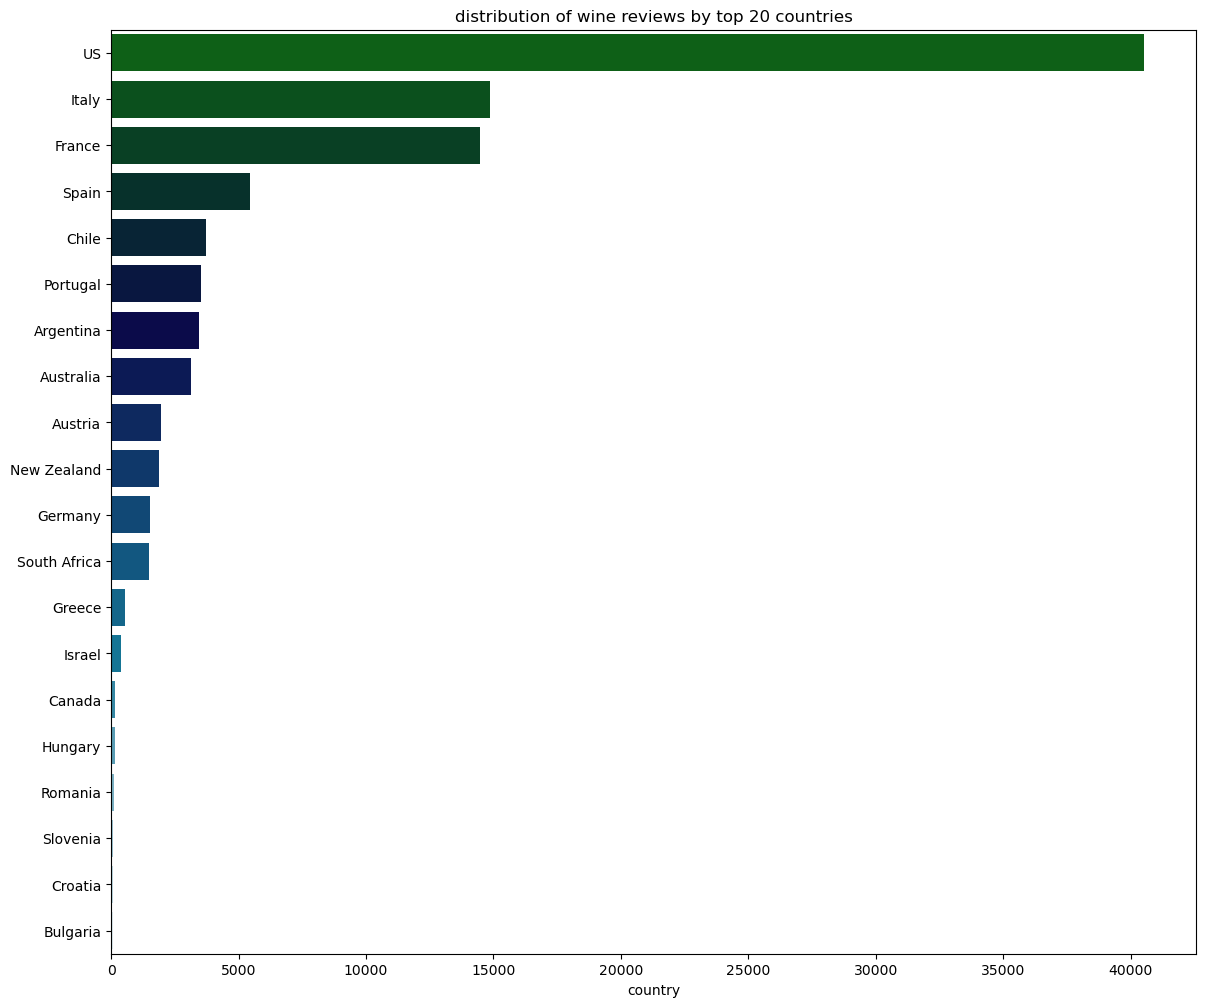

In [61]:
print('number of country list in data',df_wine['country'].nunique())
plt.figure(figsize=(14,12))
cnt=df_wine['country'].value_counts().to_frame()[0:20]
sns.barplot(x=cnt['country'], y=cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('distribution of wine reviews by top 20 countries')

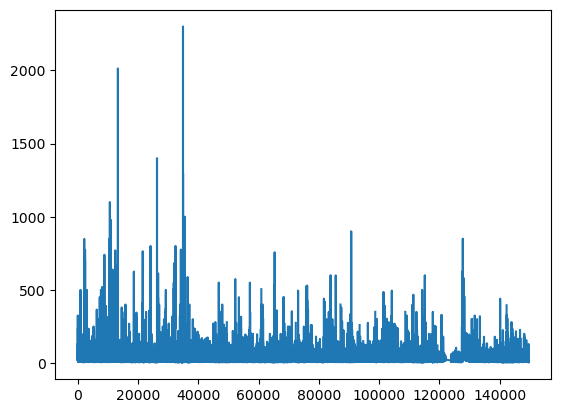

In [70]:
plt.plot(df_wine.index, df_wine["price"])

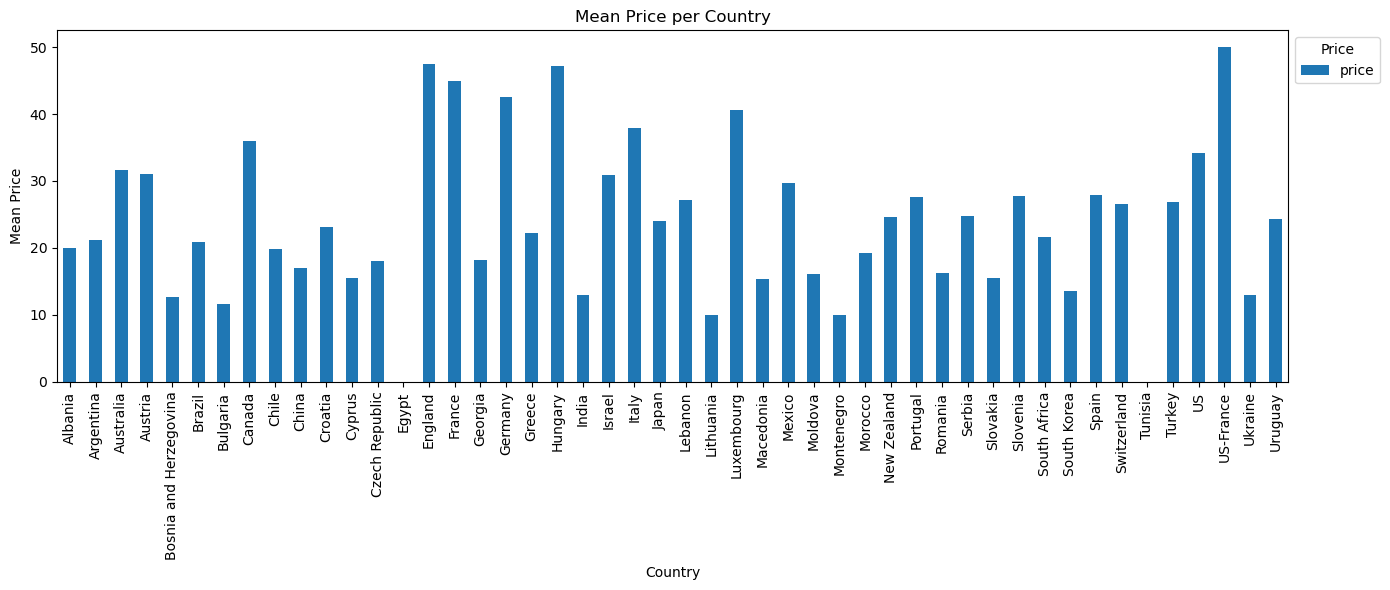

In [71]:
fig, ax = plt.subplots(figsize=(14, 6))

df_wine.groupby(df_wine['country'])['price'].mean().plot.bar()
mean_price = df_wine["price"].mean(0)
df_wine["price"].fillna(mean_price)

# Creates labels
ax.set_xlabel('Country')
ax.set_ylabel('Mean Price')
# Sets the plot title
ax.set_title("Mean Price per Country")
ax.legend(bbox_to_anchor=(1, 1), loc=2, title='Price')

fig.tight_layout()

<AxesSubplot:>

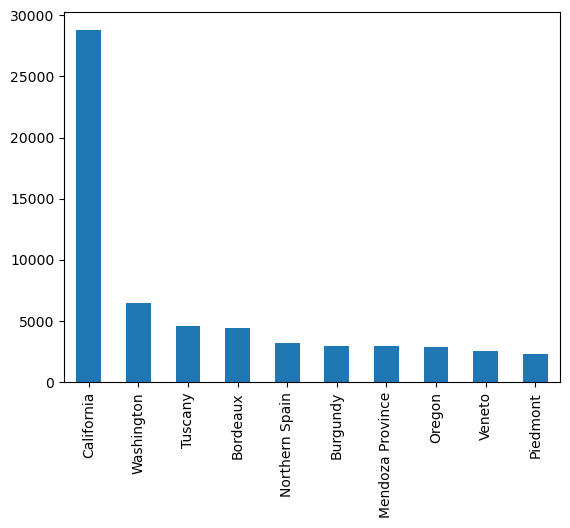

In [73]:
df_wine['province'].value_counts().head(10).plot.bar()

<AxesSubplot:>

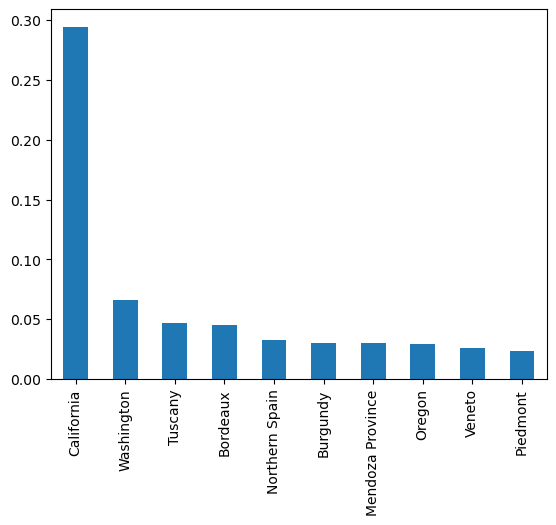

In [74]:
(df_wine['province'].value_counts().head(10) / len(df_wine)).plot.bar()

<AxesSubplot:>

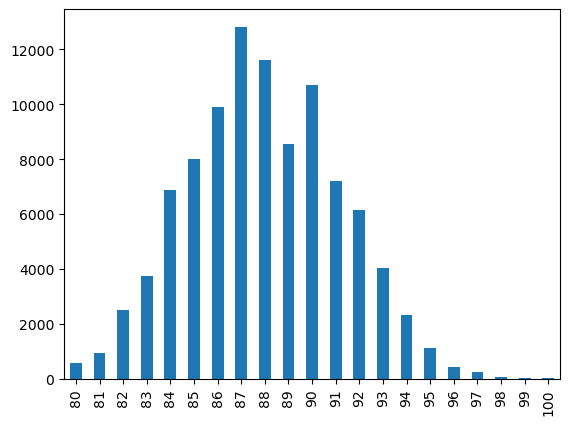

In [75]:
df_wine['points'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

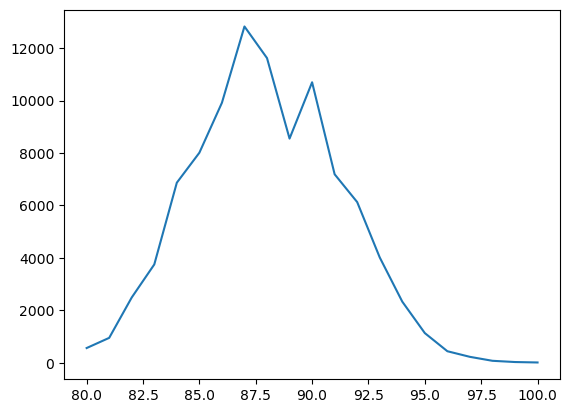

In [76]:
df_wine['points'].value_counts().sort_index().plot.line()

<AxesSubplot:xlabel='points', ylabel='count'>

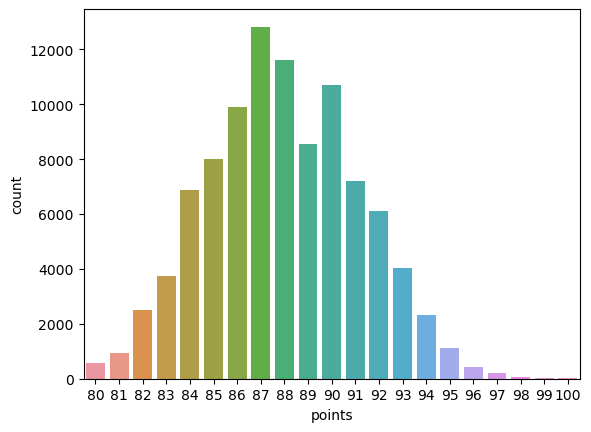

In [77]:
sns.countplot(df_wine['points'])

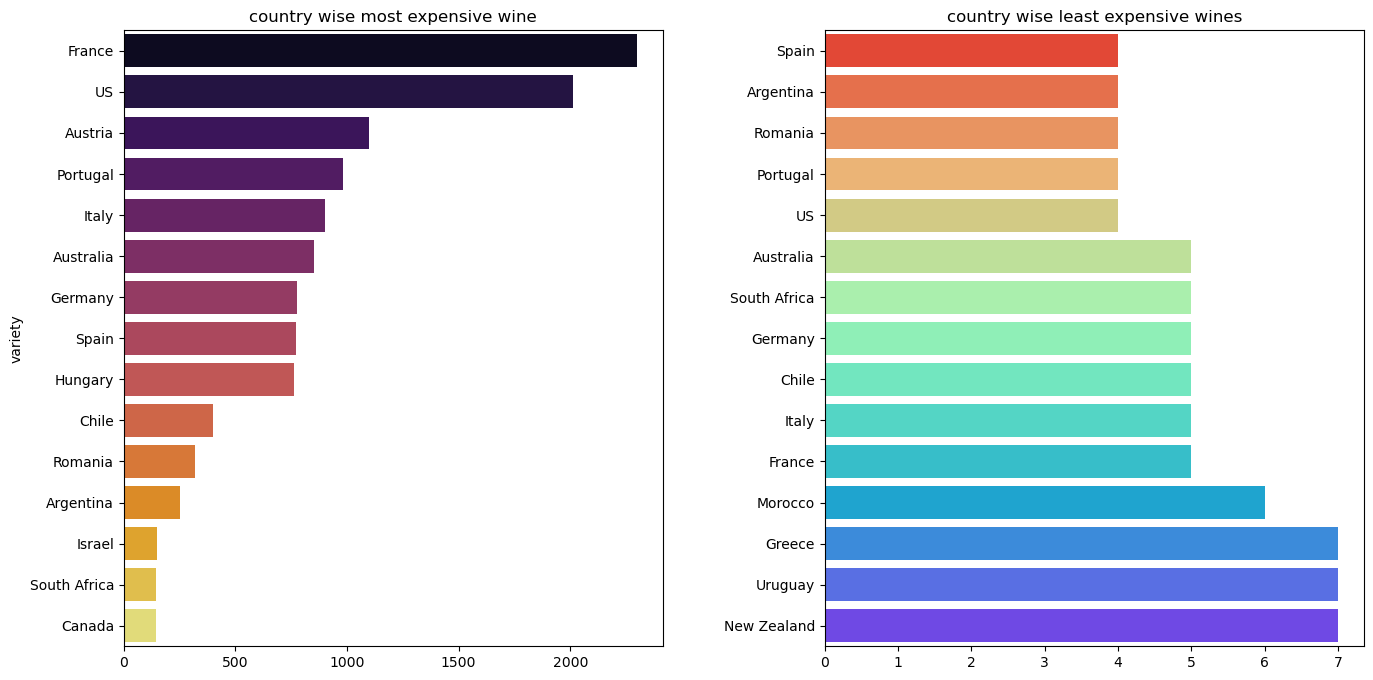

In [78]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
ax1,ax2=ax.flatten()

cnt=df_wine.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['price'], y= cnt.index, data=cnt, palette='inferno',ax=ax1)
ax1.set_title('country wise most expensive wine')
ax1.set_ylabel('variety')
ax1.set_xlabel('')

cnt= df_wine.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x=cnt['price'], y=cnt.index, data=cnt, palette='rainbow_r', ax=ax2)
ax2.set_title('country wise least expensive wines')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

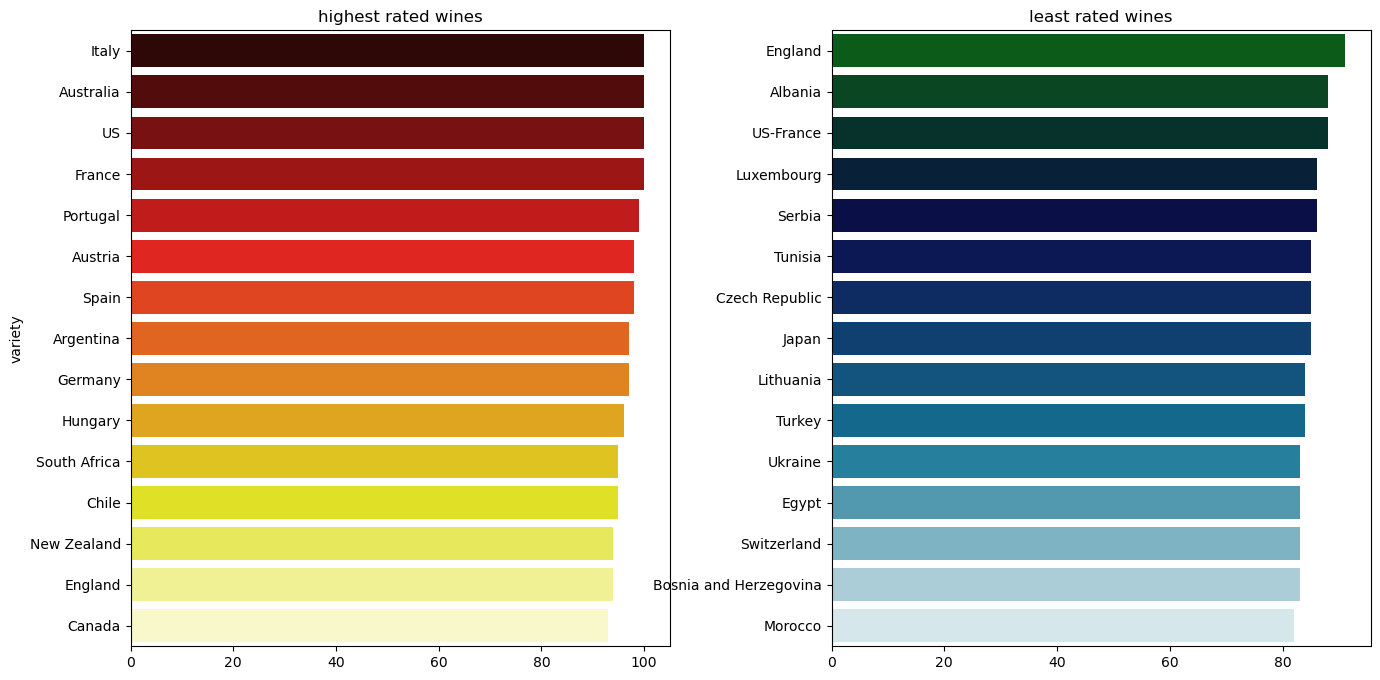

In [79]:
fig,ax= plt.subplots(1,2,figsize=(16,8))
ax1,ax2=ax.flatten()

cnt= df_wine.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['points'], y=cnt.index, data=cnt, palette='hot', ax=ax1)
ax1.set_title('highest rated wines')
ax1.set_ylabel('variety')
ax1.set_xlabel('')

cnt=df_wine.groupby(['country'])['points'].min().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['points'], y=cnt.index, data=cnt, palette='ocean', ax=ax2)
ax2.set_title('least rated wines')
ax2.set_ylabel('')
ax2.set_xlabel('')

plt.subplots_adjust(wspace=0.3)


number of variety of wines 632


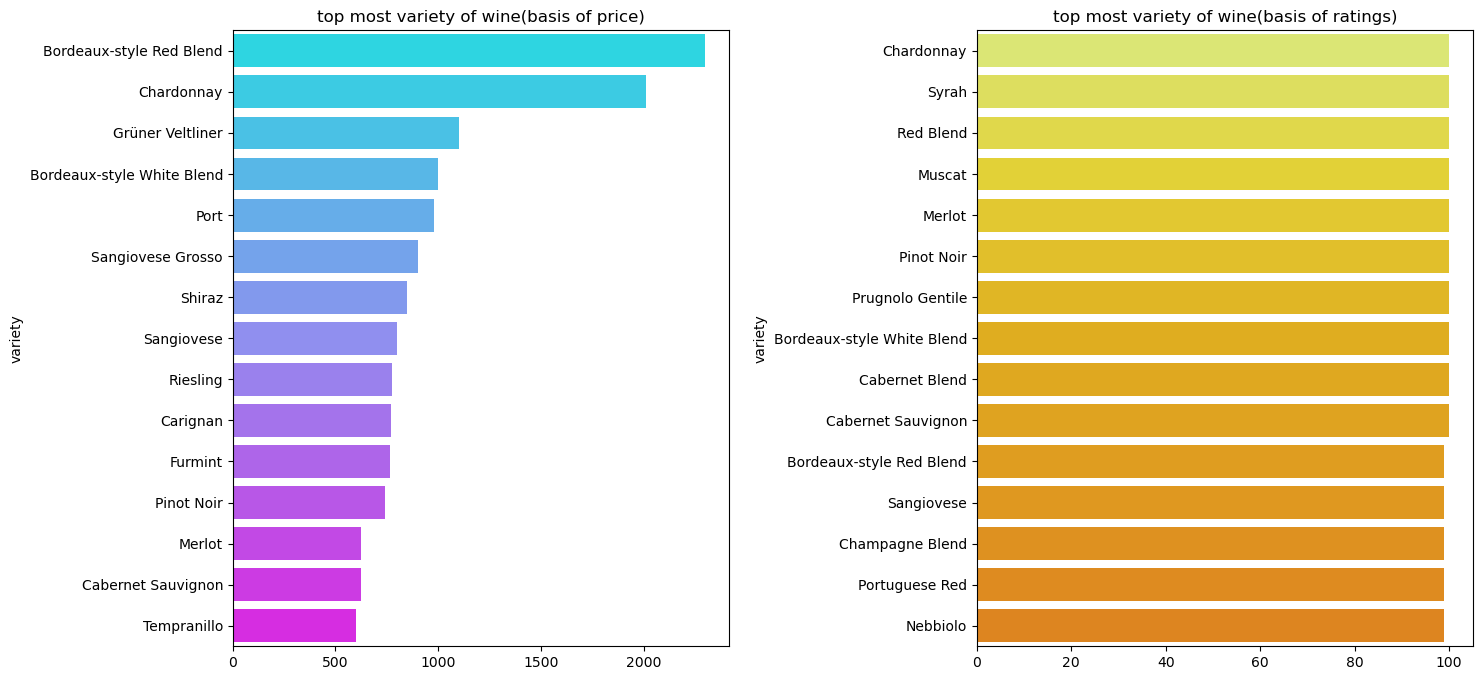

In [81]:
print('number of variety of wines',df_wine['variety'].nunique())
fig,ax=plt.subplots(1,2,figsize=(16,8))
ax1,ax2=ax.flatten()

cnt=df_wine.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['price'], y=cnt.index, palette='cool', ax=ax1)
ax1.set_title('top most variety of wine(basis of price)')
ax1.set_ylabel('variety')
ax1.set_xlabel('')

cnt=df_wine.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=cnt['points'], y=cnt.index, palette='Wistia', ax=ax2)
ax2.set_title('top most variety of wine(basis of ratings)')
ax2.set_ylabel('variety')
ax2.set_xlabel('')

plt.subplots_adjust(wspace=0.5)

number of variety of wines 632


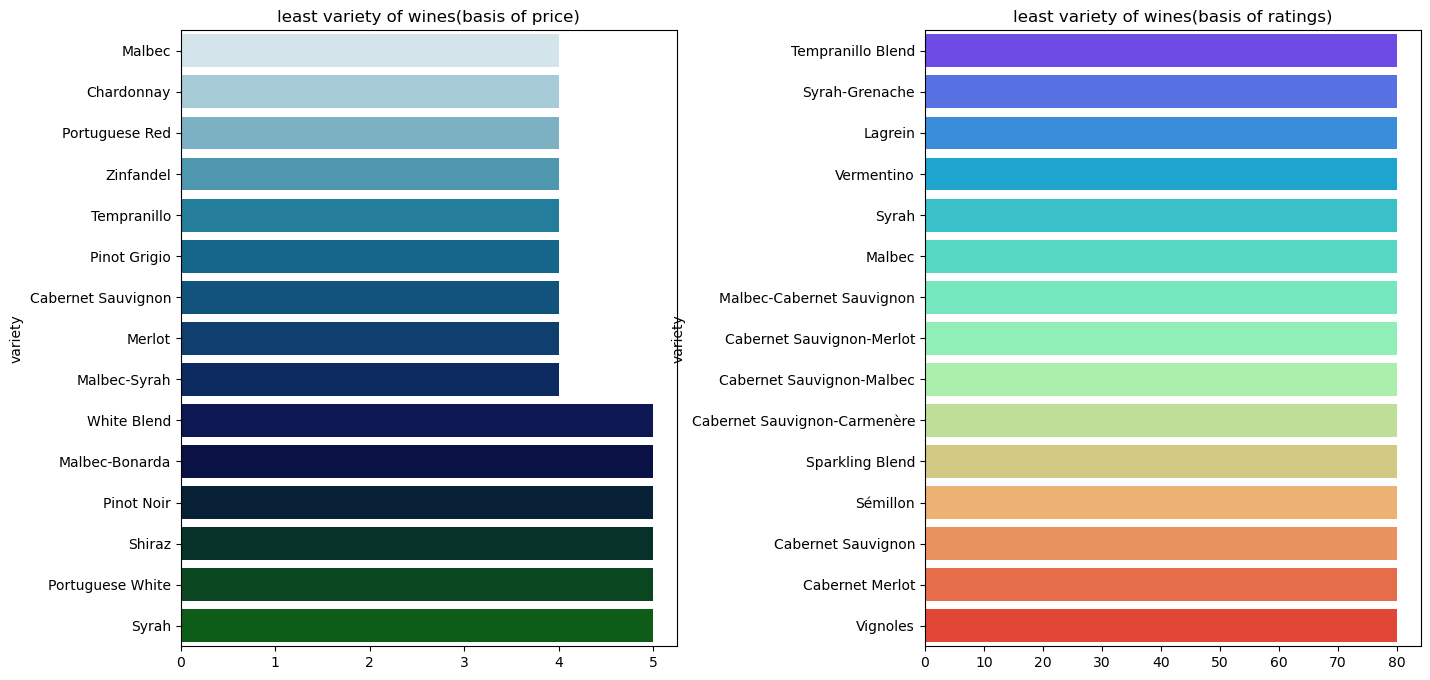

In [82]:
print('number of variety of wines',df_wine['variety'].nunique())
fig,ax=plt.subplots(1,2,figsize=(16,8))
ax1,ax2=ax.flatten()

cnt=df_wine.groupby(['variety'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x=cnt['price'], y=cnt.index, palette='ocean_r', ax=ax1)
ax1.set_title('least variety of wines(basis of price)')
ax1.set_ylabel('variety')
ax1.set_xlabel('')

cnt=df_wine.groupby(['variety'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x=cnt['points'], y=cnt.index, palette='rainbow', ax=ax2)
ax2.set_title('least variety of wines(basis of ratings)')
ax2.set_ylabel('variety')
ax2.set_xlabel('')

plt.subplots_adjust(wspace=0.5)

In [92]:
df_wine.to_csv('df_wine_cleaned.csv', index= False)